# Árboles de decisión y bosques aleatorios

## Importación de librerias

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtener los datos

In [54]:
df = pd.read_csv('C:/Users/Sirius/Desktop/Machine Learning/05ArbolesDeDecisionYBosquesAleatorios/kyphosis.csv')

In [55]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Análisis exploratorio de datos

Simplemente lo revisaremos con un pairplot simple para este pequeño conjunto de datos.

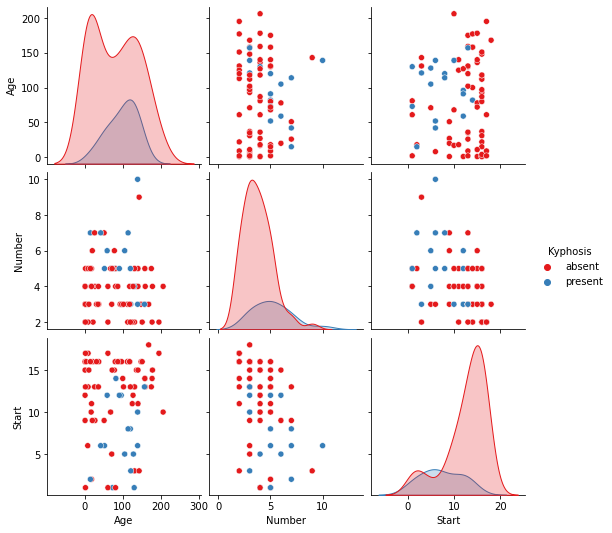

In [56]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## División en Conjunto de entrenamiento y de prueba

¡Dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba!

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

## Árboles de decisión

Comenzaremos simplemente entrenando un solo árbol de decisión.

In [60]:
from sklearn.tree import plot_tree

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [68]:
def reporte_modelo(modelo):
    pred_mod = modelo.predict(X_test)
    print(classification_report(y_test,pred_mod))
    print('\n')
    plt.figure(dpi=200)
    plot_tree(modelo,filled=True,feature_names=X.columns)
    plot_confusion_matrix(modelo,X_test,y_test)
    importancia = modelo.feature_importances_
    df_impo = pd.DataFrame(index=X.columns,data=importancia,
                           columns=['Importancia de la característica'])
    print(df_impo)        

In [66]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



        Importancia de la característica
Age                             0.468925
Number                          0.306961
Start                           0.224113


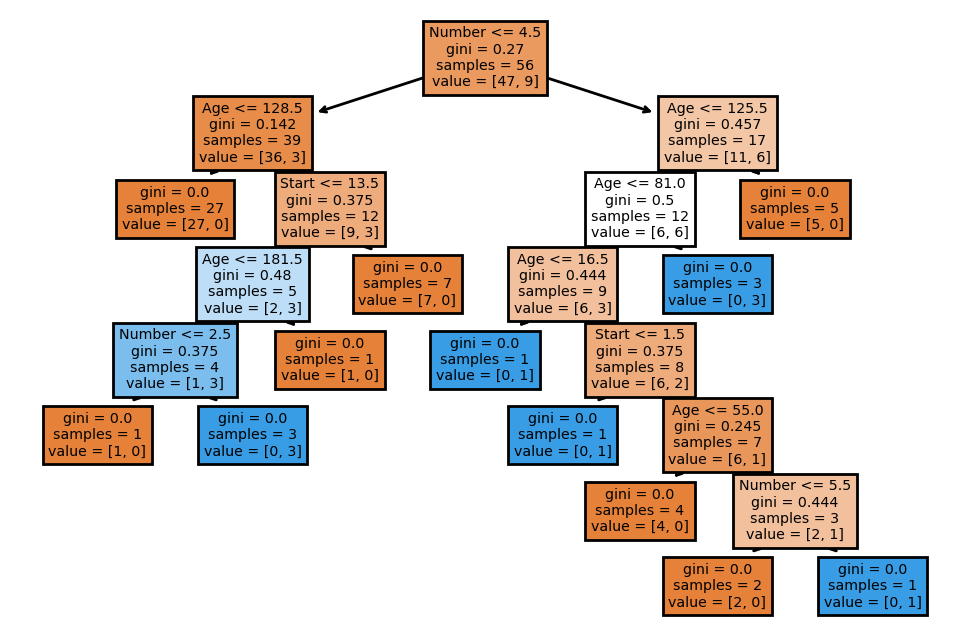

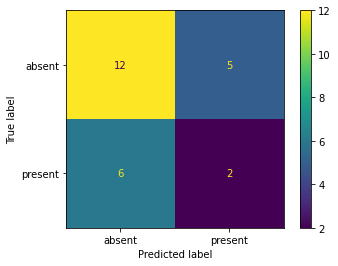

In [69]:
arb_def = DecisionTreeClassifier(random_state=100)
arb_def.fit(X_train,y_train)
reporte_modelo(arb_def)

In [40]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=101)

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

              precision    recall  f1-score   support

      absent       0.71      0.88      0.79        17
     present       0.50      0.25      0.33         8

    accuracy                           0.68        25
   macro avg       0.61      0.57      0.56        25
weighted avg       0.65      0.68      0.64        25



        Importancia de la característica
Age                             0.596926
Number                          0.139809
Start                           0.263265


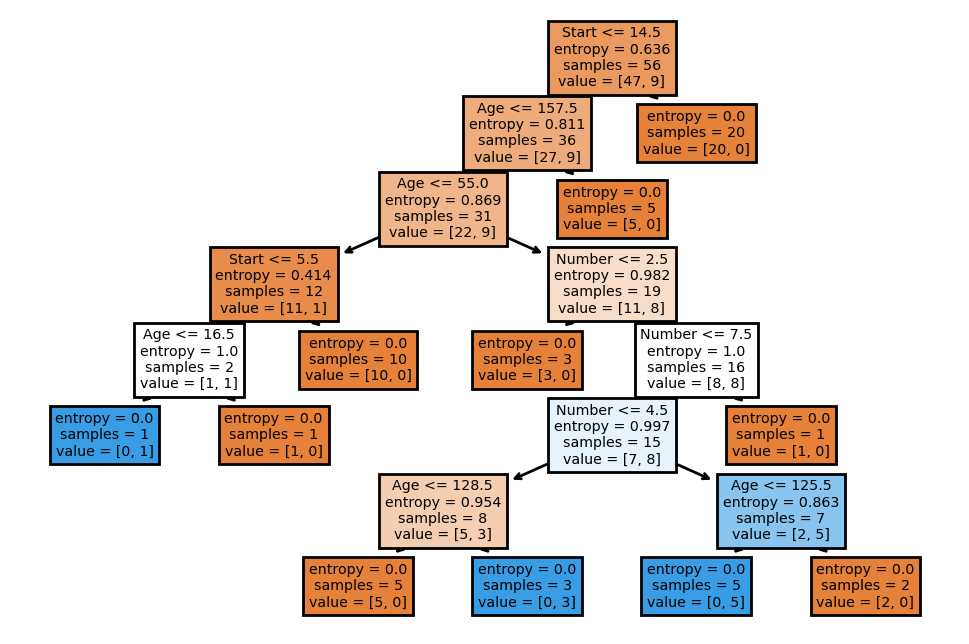

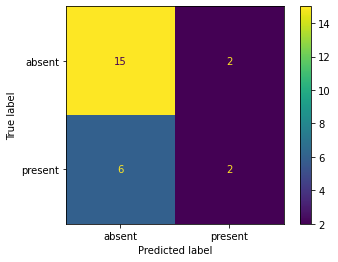

In [70]:
arb_ent = DecisionTreeClassifier(criterion='entropy',random_state=100)
arb_ent.fit(X_train,y_train)
reporte_modelo(arb_ent)

Con una profundidad maxima de 3

              precision    recall  f1-score   support

      absent       0.73      0.94      0.82        17
     present       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25



        Importancia de la característica
Age                             0.551635
Number                          0.207183
Start                           0.241181


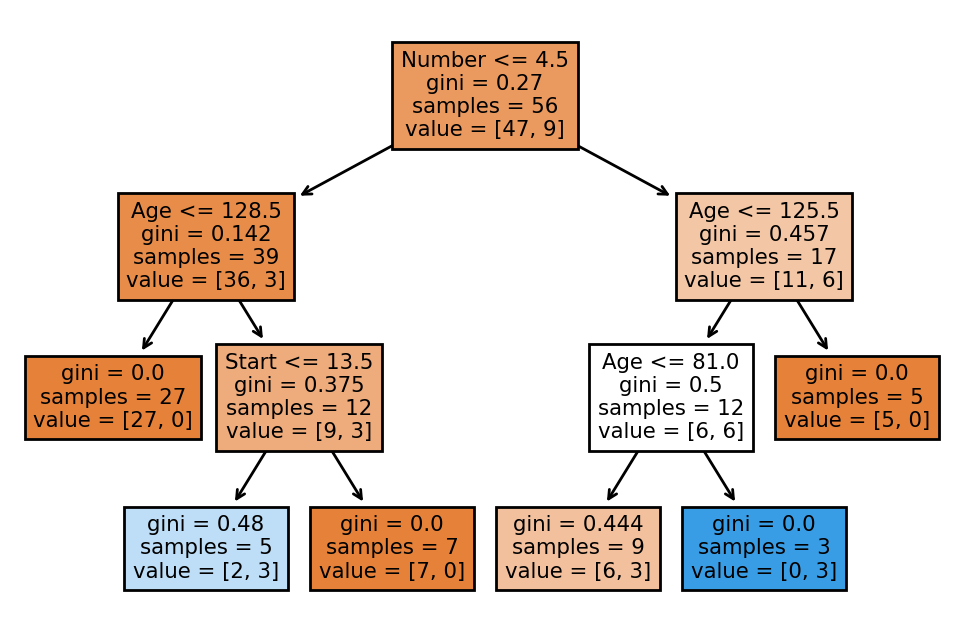

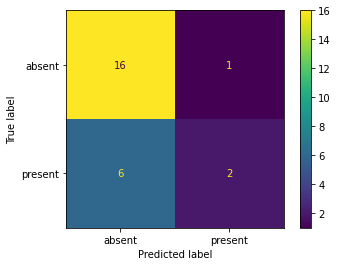

In [71]:
arb_pro2_gini = DecisionTreeClassifier(random_state=100,max_depth=3)
arb_pro2_gini.fit(X_train,y_train)
reporte_modelo(arb_pro2_gini)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      absent       0.68      1.00      0.81        17
     present       0.00      0.00      0.00         8

    accuracy                           0.68        25
   macro avg       0.34      0.50      0.40        25
weighted avg       0.46      0.68      0.55        25



        Importancia de la característica
Age                             0.465503
Number                          0.000000
Start                           0.534497


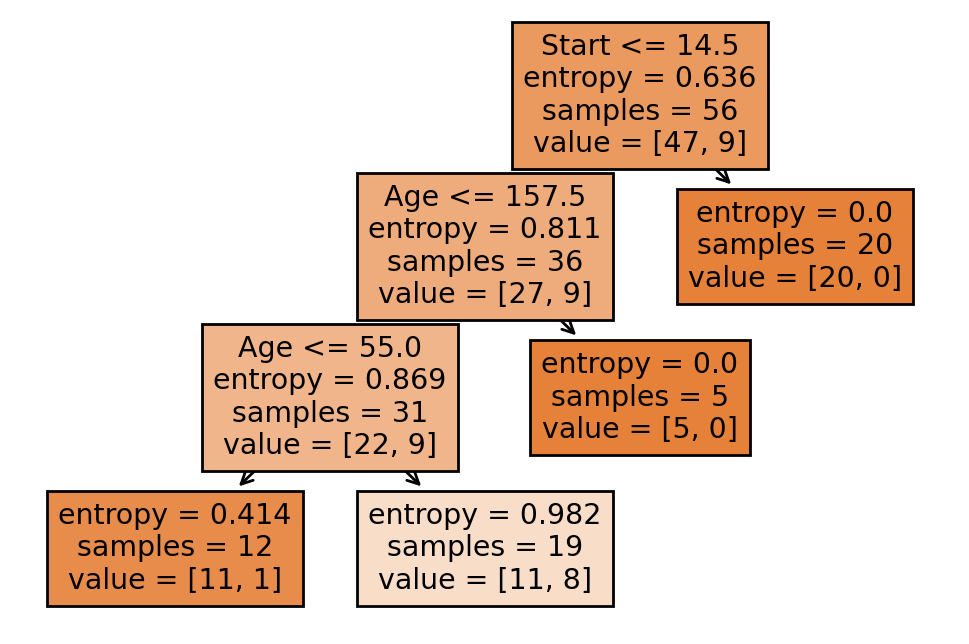

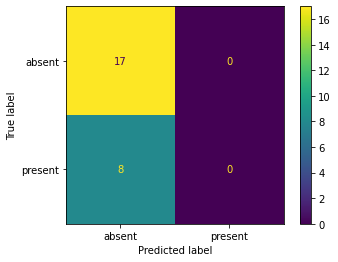

In [72]:
arb_pro3_ent = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3)
arb_pro3_ent.fit(X_train,y_train)
reporte_modelo(arb_pro3_ent)

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



        Importancia de la característica
Age                              0.67605
Number                           0.32395
Start                            0.00000


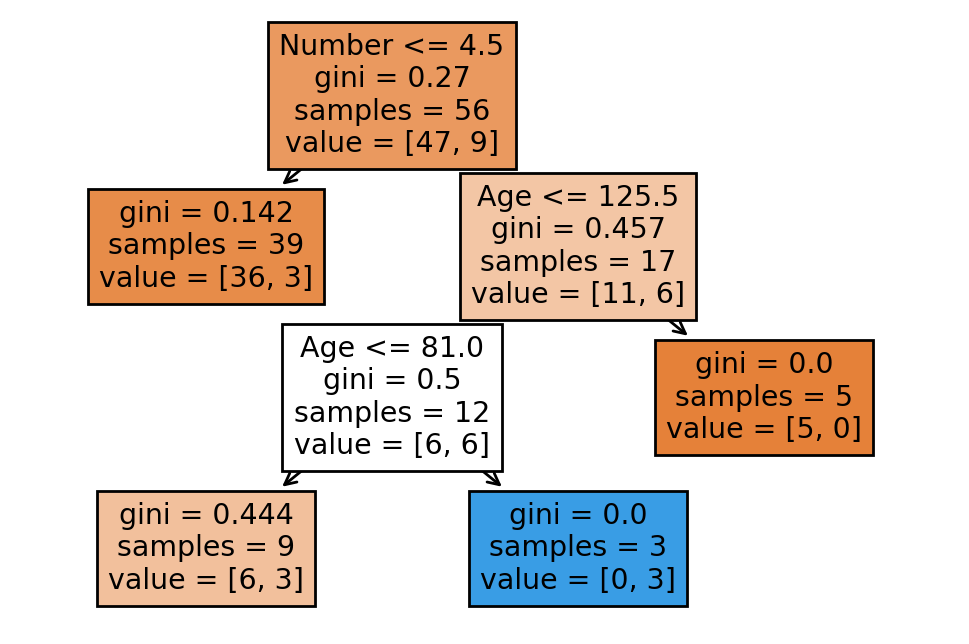

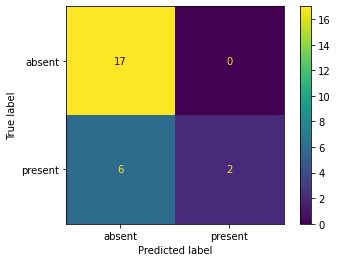

In [73]:
arb_hoj4_gini = DecisionTreeClassifier(random_state=100,max_leaf_nodes=4)
arb_hoj4_gini.fit(X_train,y_train)
reporte_modelo(arb_hoj4_gini)

              precision    recall  f1-score   support

      absent       0.88      0.82      0.85        17
     present       0.67      0.75      0.71         8

    accuracy                           0.80        25
   macro avg       0.77      0.79      0.78        25
weighted avg       0.81      0.80      0.80        25



        Importancia de la característica
Age                             0.469243
Number                          0.117185
Start                           0.413571


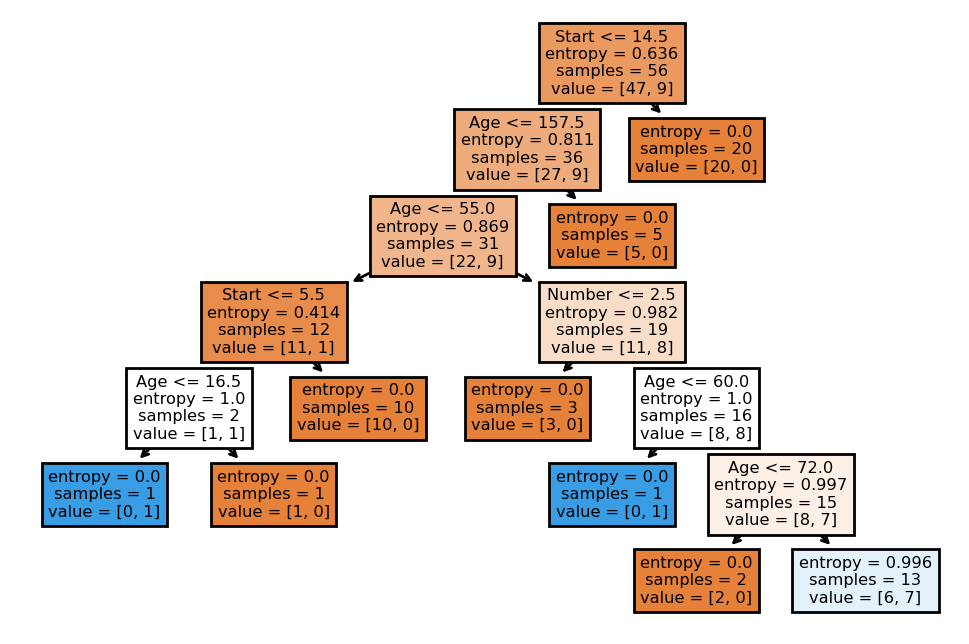

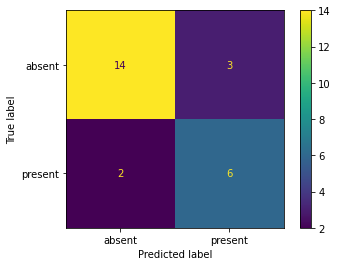

In [74]:
arb_hoj9_ent = DecisionTreeClassifier(criterion='entropy',random_state=100,max_leaf_nodes=9)
arb_hoj9_ent.fit(X_train,y_train)
reporte_modelo(arb_hoj9_ent)

## Antiguamente se hacia la visualización de la siguiente manera:

## Predicción y Evaluación¶
Evaluemos nuestro árbol de decisiones.

In [40]:
predictions = dtree.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.67      0.71      0.69        17
    present       0.29      0.25      0.27         8

avg / total       0.54      0.56      0.55        25



In [43]:
print(confusion_matrix(y_test,predictions))

[[12  5]
 [ 6  2]]


## Visualización de árbol

Scikit learn en realidad tiene algunas capacidades de visualización incorporadas para los árboles de decisión, no las usará con frecuencia y requiere que instale la biblioteca pydot, aquí hay un ejemplo de cómo se ve y el código para ejecutarlo:

In [44]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [45]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

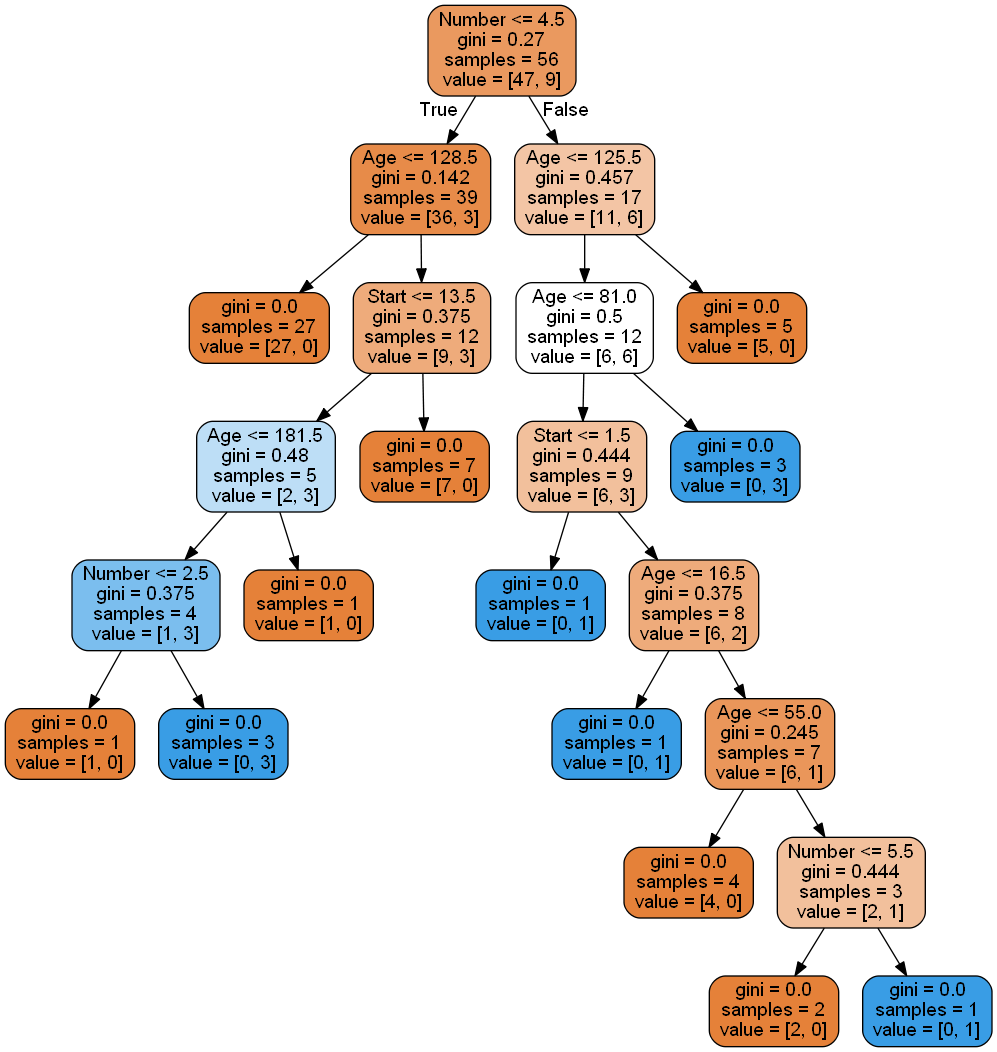

In [46]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Bosques Aleatorios

Ahora comparemos el modelo de árbol de decisión con un bosque aleatorio.


In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=100,criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [78]:
#Muestra los hiperparametros
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [79]:
def reporte_modelo_bosque_aleatorio(modelo):
    pred_mod = modelo.predict(X_test)
    print(classification_report(y_test,pred_mod))
    print('\n')
    plot_confusion_matrix(modelo,X_test,y_test)
    importancia = modelo.feature_importances_
    df_impo = pd.DataFrame(index=X.columns,data=importancia,
                           columns=['Importancia de la característica'])
    print(df_impo)       

In [80]:
rfc_pred = rfc.predict(X_test)

In [81]:
print(confusion_matrix(y_test,rfc_pred))

[[17  0]
 [ 6  2]]


In [82]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



        Importancia de la característica
Age                             0.456496
Number                          0.206567
Start                           0.336937


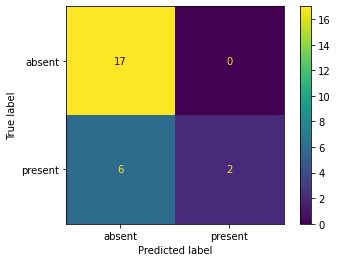

In [84]:
reporte_modelo_bosque_aleatorio(rfc)

#### 400 arboles y criterio: entropy

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



        Importancia de la característica
Age                              0.44396
Number                           0.22287
Start                            0.33317


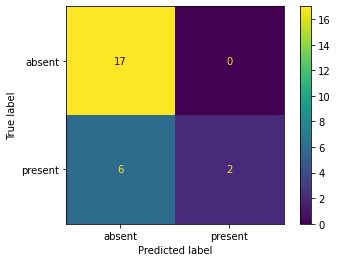

In [91]:
bos_gin200 = RandomForestClassifier(random_state=100,n_estimators=200)
bos_gin200.fit(X_train,y_train)
reporte_modelo_bosque_aleatorio(bos_gin200)

### Guardar y recuperar un modelo

In [94]:
from joblib import dump, load

In [96]:
dump(arb_hoj9_ent,'arb_hoj9_ent.joblib')

['arb_hoj9_ent.joblib']

In [97]:
arbol = load('arb_hoj9_ent.joblib')

In [103]:
X_nuevo = np.array(([11,3,15],[36,4,13]))

In [104]:
X_nuevo

array([[11,  3, 15],
       [36,  4, 13]])

In [106]:
#Nuevas prediccones
predicciones = arbol.predict(X_nuevo)

In [107]:
print(predicciones)

['absent' 'absent']


In [108]:
df.iloc[74]

Kyphosis    absent
Age             11
Number           3
Start           15
Name: 74, dtype: object

In [109]:
df.iloc[80]

Kyphosis    absent
Age             36
Number           4
Start           13
Name: 80, dtype: object

In [102]:
X_train

,Age,Number,Start
74,11,3,15
54,140,4,15
1,158,3,14
71,127,4,12
45,139,3,10
80,36,4,13
24,15,7,2
17,175,5,13
55,72,5,15
73,206,4,10


# ¡Buen trabajo!